<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-1/blob/master/CAP5610_HW1Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
from keras.datasets import mnist

#Load data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()




Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


#Prepare data for binary classifiers
binary_labels = []
binary_test_labels = []

#Training labels
for i in range(10):
  temp = []
  for j in range(len(train_labels_original)):
    if train_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_labels.append(temp)
 
#Test Labels
for i in range(10):
  temp = []
  for j in range(len(test_labels_original)):
    if test_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_test_labels.append(temp)
  




In [0]:
#Use one-hot encoding
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
#Some functions
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def activation(w, x):
  return np.dot(w,x)

def gradient(w, x, y):
  return np.dot(np.transpose(x), np.transpose(sigmoid(np.dot(x, w))-y))

def mse(w, x, y):
  loss = 0
  predictions = sigmoid(np.dot(x, w))
  for i in range(len(y)):
    loss = loss + (np.square(predictions[i]-y[i]))
                   
  loss = loss / len(y)
  return loss
  


In [0]:
import random

#Initialize weight matrix (for 10 classifiers)
weights = []

for i in range(10):
  weights.append([])
  for j in range(784):
    weights[i].append(random.random())
    




In [10]:
#Training

#Hyperparameters
epochs = 12
batch_size = 100
learning_rate = 0.01

training_loss_history = []
test_loss_history = []



#Train each binary classifier
for k in range(10):
  print('training', k, 'classifier')
  batch_count = []
  test_loss = []
  training_loss = []
  
  
  #Iterate over epochs
  for i in range(epochs):
    #Iterate over mini batches
    for j in range(int(len(train_images)/batch_size)):

      #get mini batch
      data = train_images[batch_size*j:min(len(train_images), batch_size*(j+1))]
      labels = binary_labels[k][batch_size*j:min(len(train_images), batch_size*(j+1))]



      #adjust weights
      weights[k] = weights[k] - learning_rate * gradient(weights[k], data, labels)



    training_loss.append(mse(weights[k], train_images, binary_labels[k]))
    test_loss.append(mse(weights[k], test_images, binary_test_labels[k]))

    batch_count.append(i)
    print("Epoch", i, 'Training loss:', training_loss[i], 'Test Loss', test_loss[i])
   
  #Add loss for each binary clasifier to history
  training_loss_history.append(training_loss)
  test_loss_history.append(test_loss)
  
  

training 0 classifier
Epoch 0 Training loss: 0.014008179906905019 Test Loss 0.011445973181329913
Epoch 1 Training loss: 0.010352171699625191 Test Loss 0.008323088785379188
Epoch 2 Training loss: 0.00907454451659553 Test Loss 0.0072108114734969475
Epoch 3 Training loss: 0.008445760834948477 Test Loss 0.00670140005657494
Epoch 4 Training loss: 0.008035509404670847 Test Loss 0.006408990058368616
Epoch 5 Training loss: 0.007732440463200747 Test Loss 0.006216548062758473
Epoch 6 Training loss: 0.0074938988150756785 Test Loss 0.006079203721495466
Epoch 7 Training loss: 0.007299210136186819 Test Loss 0.005976532898211299
Epoch 8 Training loss: 0.0071366167475176165 Test Loss 0.005897648540979865
Epoch 9 Training loss: 0.006998597153218397 Test Loss 0.0058359227671071975
Epoch 10 Training loss: 0.006879942892600636 Test Loss 0.0057869279379170555
Epoch 11 Training loss: 0.006776853453691599 Test Loss 0.005747538730277689
training 1 classifier
Epoch 0 Training loss: 0.010519508426918893 Test Lo

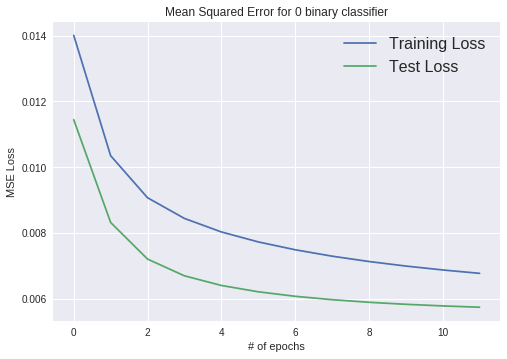

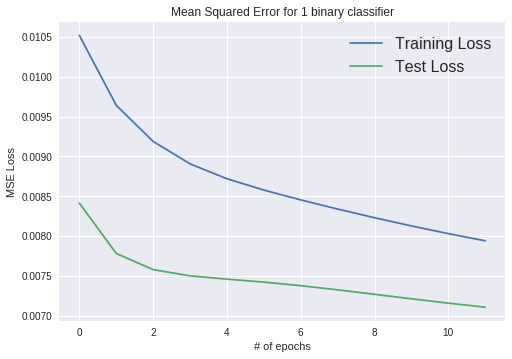

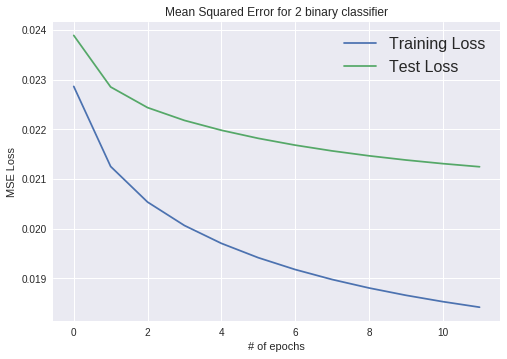

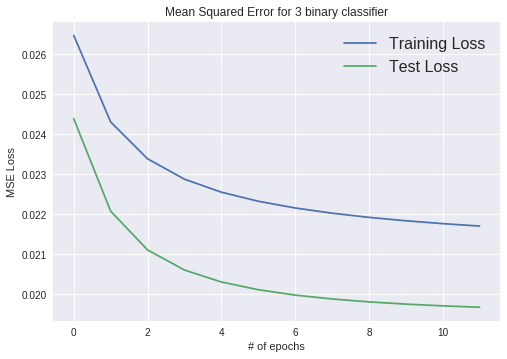

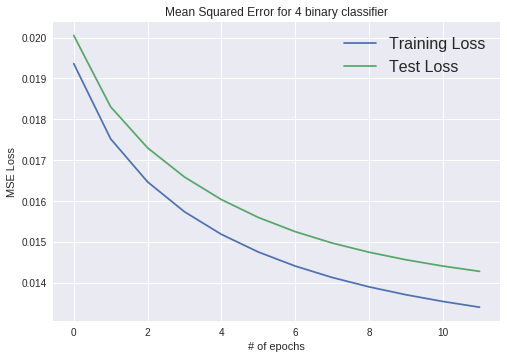

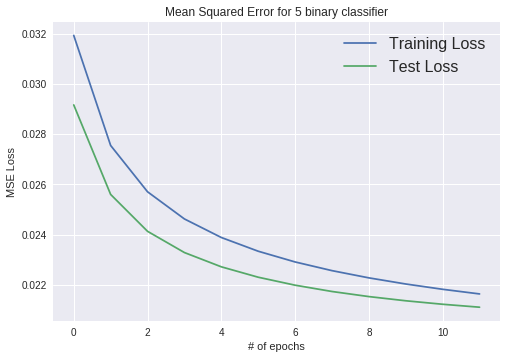

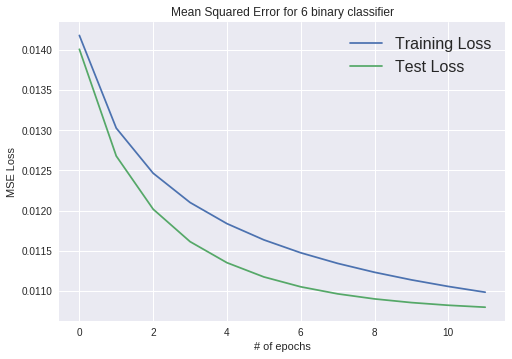

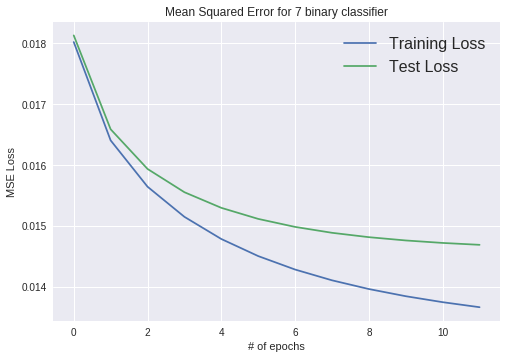

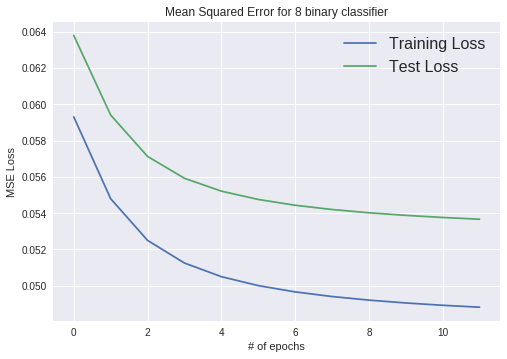

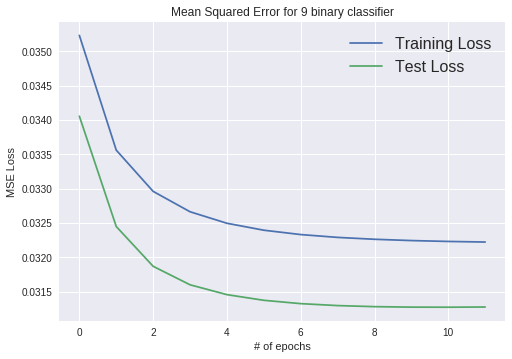

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt


for i in range(10):
  
  plt.plot(batch_count, training_loss_history[i], label = "Training Loss")
  plt.plot(batch_count, test_loss_history[i], label = "Test Loss")
  plt.legend(loc="upper right", fontsize=16)
  plt.xlabel("# of epochs")
  plt.ylabel("MSE Loss")
  plt.title("Mean Squared Error for %i binary classifier" % i)
  plt.show()
